## Lead Scoring Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#### Steps Followed
    1) Importing Data and required packages
    2) Inspecting the data frame
    3) Data Cleanup
    4) EDA
    5) Data Preparation
    6) Model Building
    7) Model Evaluation
    8) Finding Optimal Cutoff Point
    9) Making predictions on the test set
    10) Conclusion

### Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all datasets
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Observation:
    - Lot of columns have missing data. We will require data cleanup

### Step 3: Data Cleanup

In [7]:
# Replacing 'Select' with NaN (Since it is as good as null value)
df = df.replace('Select',np.nan)

#### Dropping high null columns

In [8]:
# Check the % of missing values in each column

percent_missing = round(df.isnull().sum()/len(df),2)*100
missing_value_df = pd.DataFrame({'missing %': percent_missing})
missing_value_df.sort_values('missing %', inplace=True, ascending=False)
missing_value_df

,missing %
How did you hear about X Education,78.0
Lead Profile,74.0
Lead Quality,52.0
Asymmetrique Profile Score,46.0
Asymmetrique Activity Score,46.0
Asymmetrique Profile Index,46.0
Asymmetrique Activity Index,46.0
City,40.0
Specialization,37.0
Tags,36.0


In [9]:
# Dropping all columns with 30% or more null values
over30 = missing_value_df[missing_value_df['missing %']>=30].index
over30

Index(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'City',
       'Specialization', 'Tags'],
      dtype='object')

In [10]:
df.drop(over30,axis=1,inplace=True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


#### Country

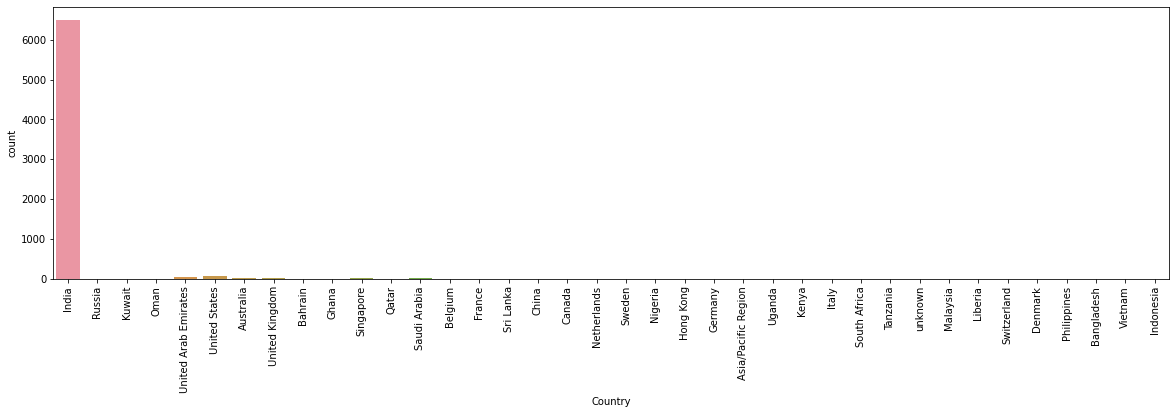

In [11]:
### 'Country' with 27% nulls
plt.figure(figsize=(20,5))
sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.show()

In [12]:
### Most of the leads belong to "India", hence deleting this column
df=df.drop('Country',axis=1)

#### 'What is your current occupation' 

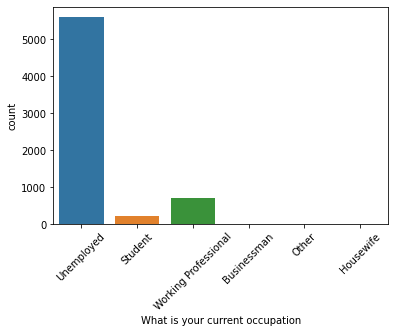

In [13]:
#### 'What is your current occupation' with 29% nulls
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [14]:
### Since most of the values are "Unemployed", filling nulls with mode
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0], inplace=True)

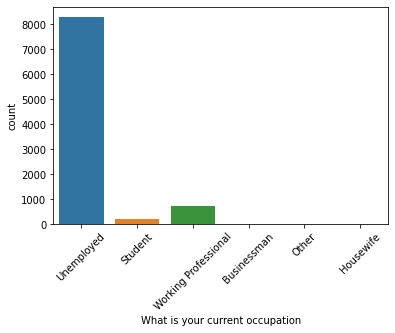

In [15]:
### Rechecking the plot
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

#### 'What matters most to you in choosing a course'

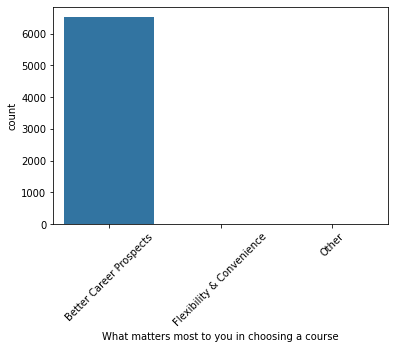

In [16]:
### 'What matters most to you in choosing a course' with 29% nulls
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

In [17]:
### dropping this column as most of the values belong to "Better Career Prospects"
df=df.drop('What matters most to you in choosing a course',axis=1)

In [18]:
# Rechecking null values
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [19]:
### dropping nulls as remaining columns have nulls<=1%
df.dropna(inplace = True)

In [20]:
# Rechecking null values
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

### Step 4: Perform EDA
- Univariate and Bivariate Analysis using Data Visualization
- Handling outliers

#### 1. Target Variable 'Converted'

In [21]:
round(sum(df['Converted'])/len(df['Converted']),2)*100

38.0

Lead conversion rate is 38%

#### 2. Lead Origin

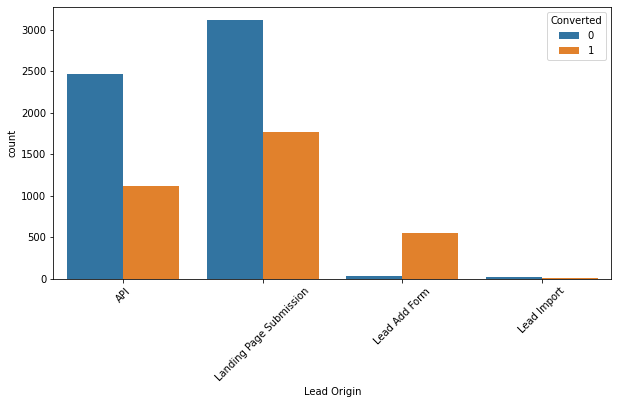

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation = 45)
plt.show()

Observations:
- API and Landing Page Submission have low conversion rate but count of lead originated from them is high.
- Lead Add Form has the highest conversion rate but count of lead is low.

#### 3. Lead Source

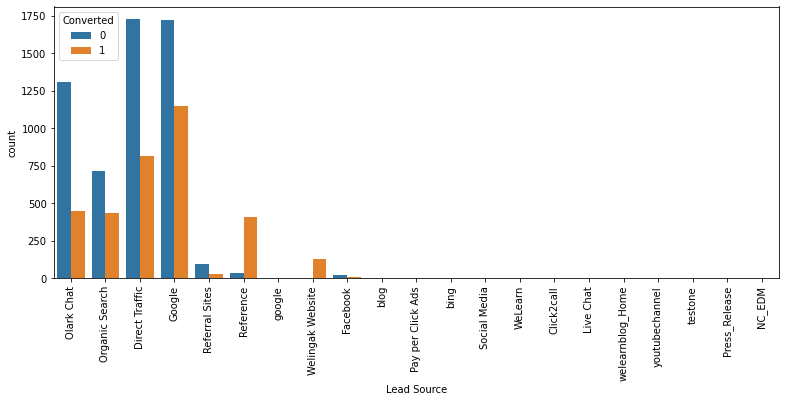

In [23]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [24]:
# Replacing 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

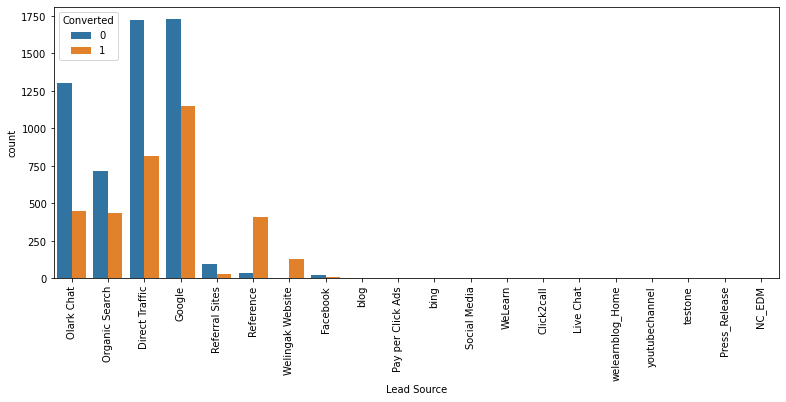

In [25]:
### Checking the plot again

plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observations:
- Direct Traffic and google have ~50% to 60% conversion rate and also the count of lead originated from them is high, followed by Olark Chat
- Reference and welingak website have highest conversion rate but count of lead is low.

#### 4. Do Not Email

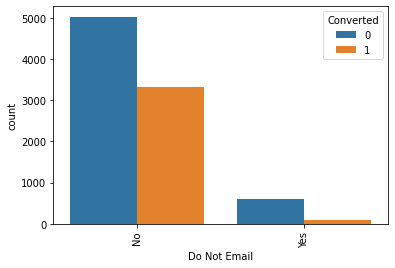

In [26]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Most of the leads answer No to "Do Not Email"

#### 5. Do not call

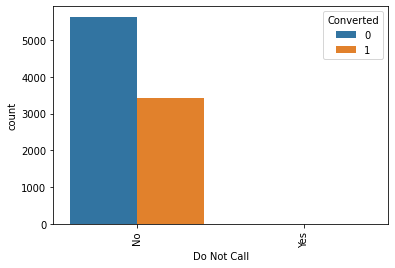

In [27]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Most of the values are "No". This column can be dropped.

#### 6. Total Visits

<AxesSubplot:xlabel='TotalVisits'>

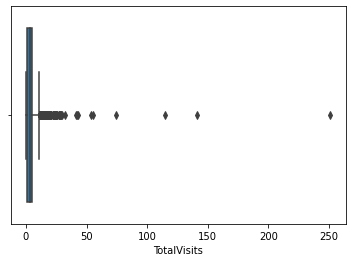

In [28]:
sns.boxplot(df['TotalVisits'])

In [29]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [30]:
### Outliers Treatment
## Capping : We will cap upper bound outliers equal to upper bound
## Flooring :We will floor lower bound outliers equal to lower bound

q1=df['TotalVisits'].describe()["25%"]
q3=df['TotalVisits'].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df['TotalVisits']=np.where(df['TotalVisits']>upper_bound,upper_bound,df['TotalVisits'])## capping
df['TotalVisits']=np.where(df['TotalVisits']<lower_bound,lower_bound,df['TotalVisits'])## flooring

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

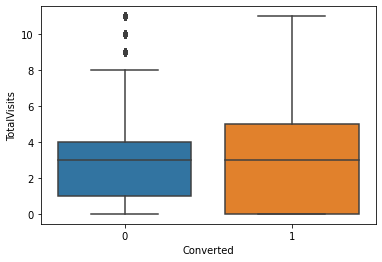

In [31]:
### Checking the plot again
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

Observation
- Median for converted and not converted leads are the same.

#### 7. Total Time Spent on Website

<AxesSubplot:xlabel='Total Time Spent on Website'>

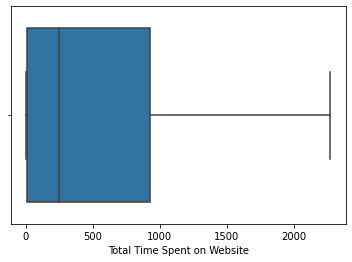

In [32]:
sns.boxplot(df['Total Time Spent on Website'])

In [33]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

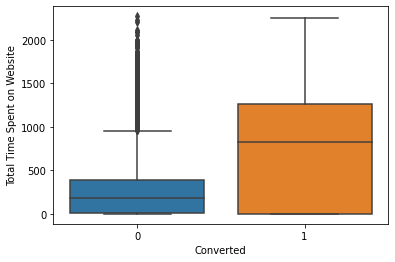

In [34]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

Observation
- Leads spending more time on website are more likely to convert

#### 8. Page Views Per Visit

<AxesSubplot:xlabel='Page Views Per Visit'>

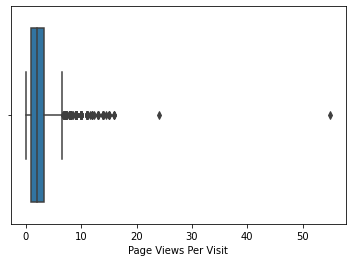

In [35]:
sns.boxplot(df['Page Views Per Visit'])

In [36]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [37]:
### Outliers Treatment
## Capping : We will cap upper bound outliers equal to upper bound
## Flooring :We will floor lower bound outliers equal to lower bound

q1=df['Page Views Per Visit'].describe()["25%"]
q3=df['Page Views Per Visit'].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df['Page Views Per Visit']=np.where(df['Page Views Per Visit']>upper_bound,upper_bound,df['Page Views Per Visit'])## capping
df['Page Views Per Visit']=np.where(df['Page Views Per Visit']<lower_bound,lower_bound,df['Page Views Per Visit'])## flooring

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

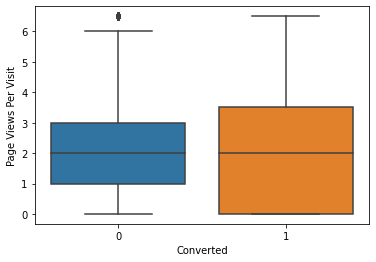

In [38]:
### checking the plot again
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

Observation
- Median for converted and not converted leads are the same.

#### 9. Last Activity 

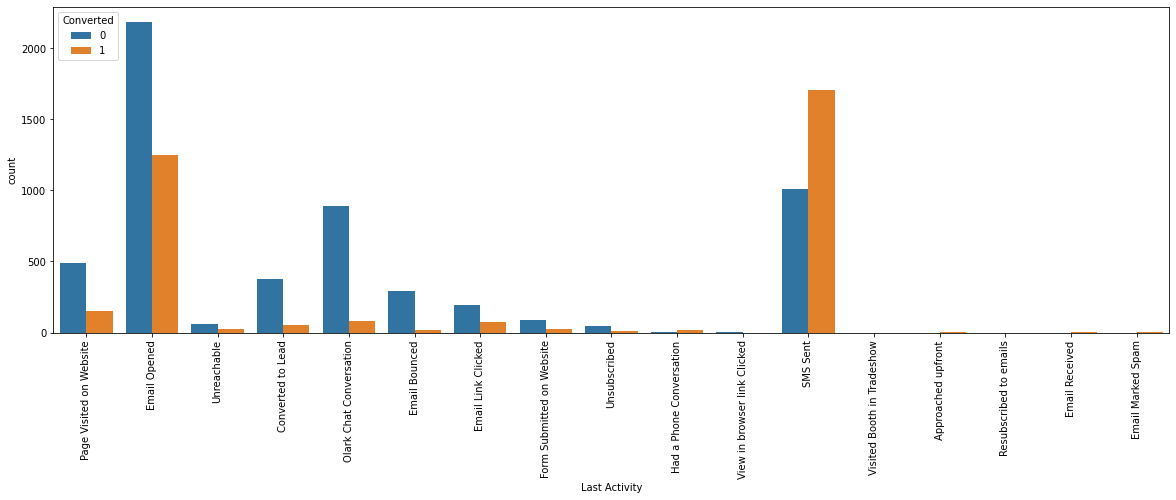

In [39]:
plt.figure(figsize=(20,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [40]:
### Outliers Treatment
## Capping : We will cap upper bound outliers equal to upper bound
## Flooring :We will floor lower bound outliers equal to lower bound

q1=df['Total Time Spent on Website'].describe()["25%"]
q3=df['Total Time Spent on Website'].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df['Total Time Spent on Website']=np.where(df['Total Time Spent on Website']>upper_bound,upper_bound,df['Total Time Spent on Website'])## capping
df['Total Time Spent on Website']=np.where(df['Total Time Spent on Website']<lower_bound,lower_bound,df['Total Time Spent on Website'])## flooring

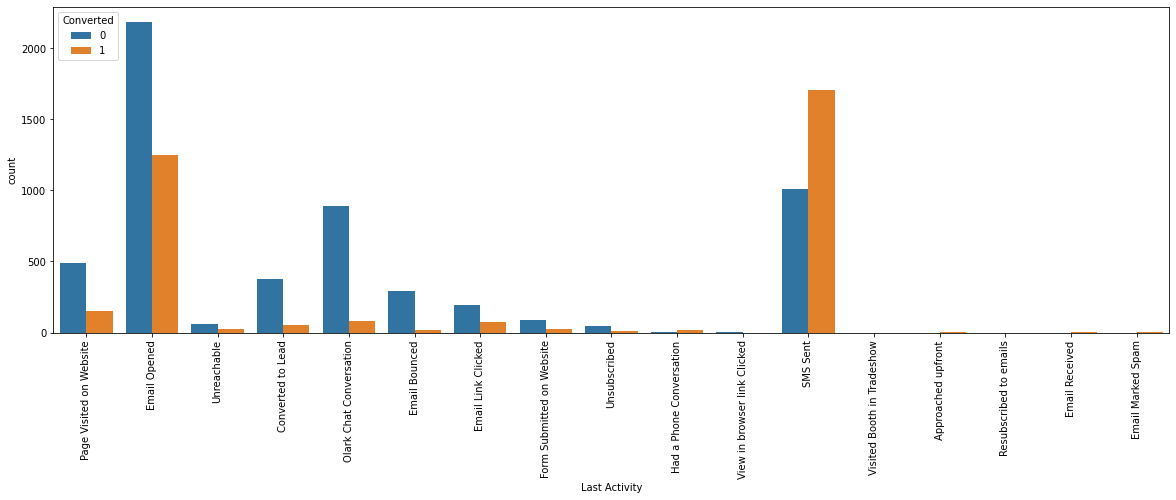

In [41]:
### Checking the plot again
plt.figure(figsize=(20,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observation
- Conversion rate is highest for leads who have last activity as SMS Sent, followed by Email Opened

#### 10. I agree to pay the amount through cheque

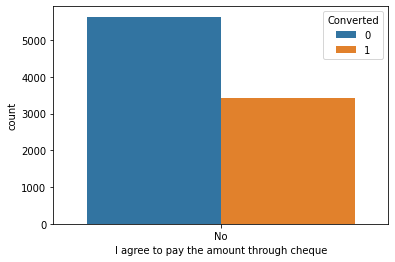

In [42]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df)
plt.show()

Observation:
- Most of the values are "No". Column can be dropped

#### 11. What is your current occupation 

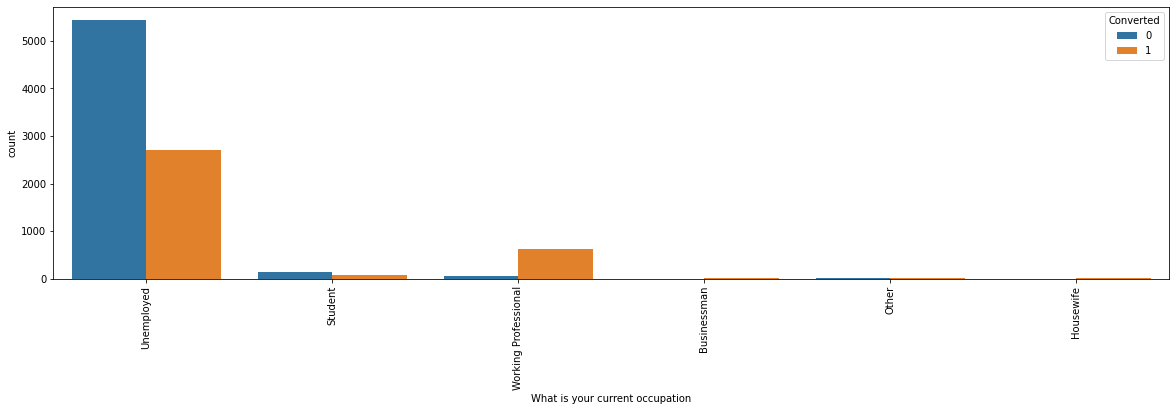

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observation:

- Working Professionals have highest conversion rate
- Most of the leads are Unemployed but have only ~40% chance of converting.

#### 12. Search

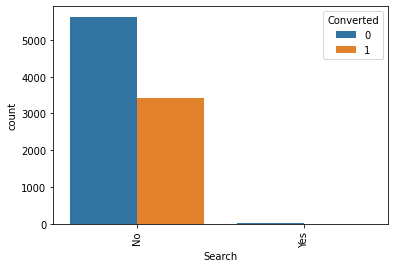

In [44]:
sns.countplot(x = "Search", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Most of the values are "No". No Inference can be drawn.

#### 13. Newspaper Article

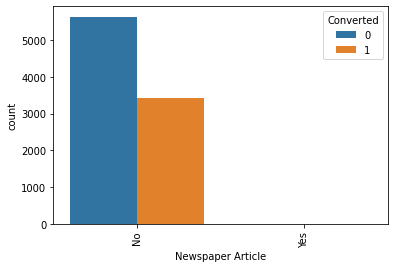

In [45]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### 14. X Education Forums

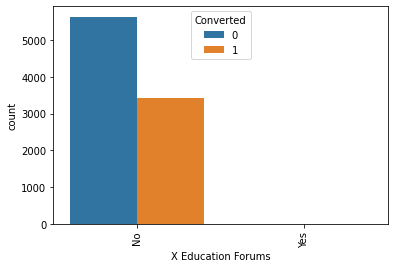

In [46]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Most of the values are "No". No Inference can be drawn.

#### 15. Newspaper

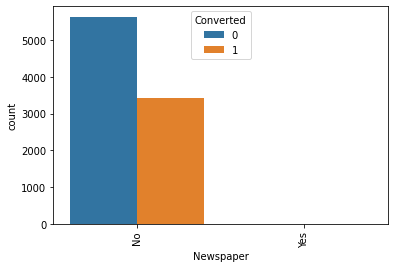

In [47]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Most of the values are "No". No Inference can be drawn.

#### 16. Digital Advertisement

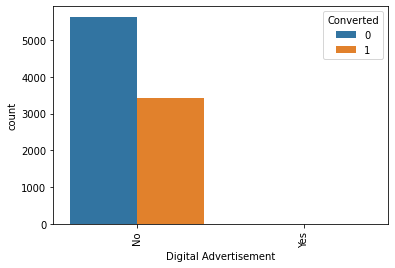

In [48]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Most of the values are "No". No Inference can be drawn.

#### 17. Through Recommendations

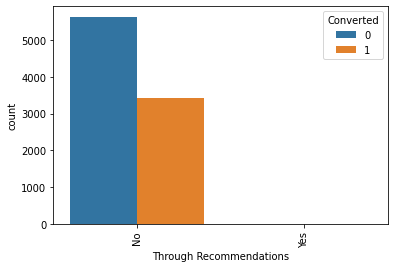

In [49]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Most of the values are "No". No Inference can be drawn.

#### 18. A free copy of Mastering The Interview

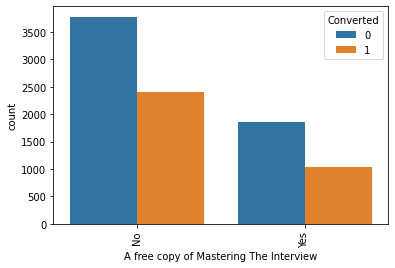

In [50]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### 19. Last Notable Activity

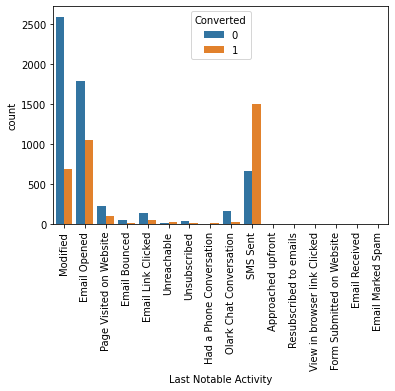

In [51]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### 20. Magazine

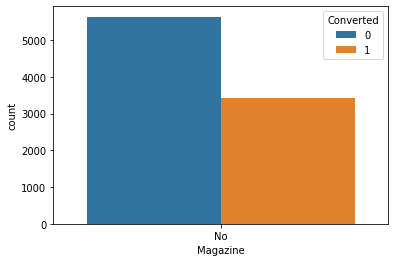

In [52]:
sns.countplot(x = "Magazine", hue = "Converted", data = df)
plt.show()

Observation:
- Most of the values are "No". Column can be dropped

#### 21. Receive More Updates About Our Courses

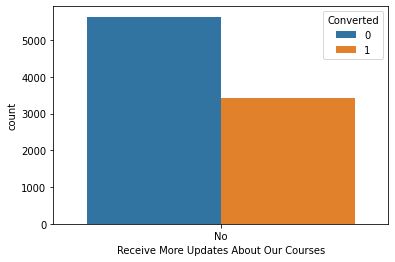

In [53]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df)
plt.show()

Observation:
- Most of the values are "No". Column can be dropped

#### 22. Update me on Supply Chain Content

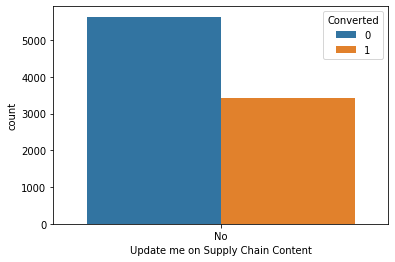

In [54]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df)
plt.show()

Observation:
- Most of the values are "No". Column can be dropped

#### 23. Get updates on DM Content

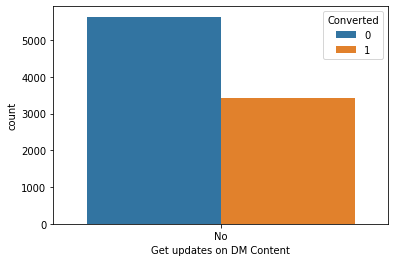

In [55]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df)
plt.show()

Observation:
- Most of the values are "No". Column can be dropped

#### 24. Correlations of numeric values


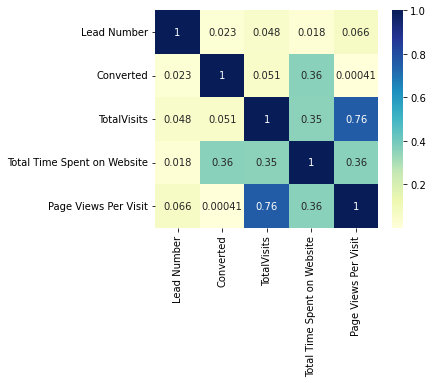

In [56]:
plt.figure(figsize=(5,4))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Observation:
- TotalVisits and 'Page Views Per Visit' are highly correlated

#### Dropping columns from which no inferences could be drawn.

In [57]:
df = df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Do Not Call',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1)

In [58]:
# Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.
df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace=True)

In [59]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0.0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674.0,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305.0,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Converted to Lead,Unemployed,No,Modified


### Step 5: Data Preparation

In [60]:
# Check the columns which are of type 'object' to get categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 1. Converting to binary variables (Yes/No) to 0/1

In [61]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [62]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Unemployed,0,Modified


#### 2. Perform One Hot Encoding

In [63]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 
                            'Last Activity','What is your current occupation',
                              'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Unemployed,0,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Student,1,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Unreachable,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
#### Dropping the columns for which dummies were created
df.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity'], axis = 1, inplace=True)

In [65]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532.0,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305.0,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428.0,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   float64
 4   Page Views Per Visit                                  9074 non-null   float64
 5   A free copy of Mastering The Interview                9074 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 8   Lead Origin_Lead Import                               9074

#### 3. Test-Train Split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# putting feature variables in X
X=df.drop('Converted', axis=1)

In [69]:
# Putting response variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 4. Feature Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0.181818,0.178347,0.307692,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0.181818,0.085355,0.307692,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0.181818,0.619946,0.307692,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.454545,0.711590,0.384615,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


#### 5. Looking at Correlations

In [73]:
df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.140786,0.002947,-0.046192,0.023866,0.058023,0.099661,-0.031468,-0.016857,0.112262,...,-0.003073,-0.011505,0.122812,-0.012911,0.050922,-0.003073,-0.029608,-0.010516,0.241202,-0.003073
Converted,-0.140786,1.000000,0.051452,0.359261,0.000415,-0.030860,-0.037481,0.300775,-0.009328,-0.073186,...,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
TotalVisits,0.002947,0.051452,1.000000,0.354607,0.755206,0.293006,0.443689,-0.270057,-0.059263,0.124209,...,-0.004486,0.030966,-0.154453,-0.059392,0.202550,-0.011774,0.019463,0.013950,0.010138,0.017381
Total Time Spent on Website,-0.046192,0.359261,0.354607,1.000000,0.359009,0.177435,0.292571,-0.188526,-0.050742,0.140793,...,-0.003772,0.022925,-0.127020,-0.050877,0.028713,-0.009298,0.137169,0.009594,0.003951,-0.007584
Page Views Per Visit,0.023866,0.000415,0.755206,0.359009,1.000000,0.296407,0.546523,-0.304267,-0.064965,0.156412,...,-0.001635,0.017449,-0.118300,-0.098826,0.032408,-0.013082,0.070508,0.021552,0.023640,0.002199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,-0.003073,0.013451,-0.011774,-0.009298,-0.013082,-0.007173,-0.011337,-0.002746,-0.000605,-0.006551,...,-0.000110,-0.000413,-0.007875,-0.001506,-0.002001,1.000000,-0.005854,-0.000625,-0.000741,-0.000110
Last Notable Activity_SMS Sent,-0.029608,0.360233,0.019463,0.137169,0.070508,0.025631,0.052736,0.115585,-0.027600,0.016095,...,-0.005854,-0.021918,-0.418219,-0.079994,-0.106259,-0.005854,1.000000,-0.033170,-0.039363,-0.005854
Last Notable Activity_Unreachable,-0.010516,0.037893,0.013950,0.009594,0.021552,0.003254,-0.000847,0.007222,-0.003426,-0.016425,...,-0.000625,-0.002339,-0.044621,-0.008535,-0.011337,-0.000625,-0.033170,1.000000,-0.004200,-0.000625
Last Notable Activity_Unsubscribed,0.241202,-0.016286,0.010138,0.003951,0.023640,0.022491,0.018171,-0.018465,-0.004066,0.004851,...,-0.000741,-0.002775,-0.052952,-0.010128,-0.013454,-0.000741,-0.039363,-0.004200,1.000000,-0.000741


### Step 6: Model Building

In [74]:
import statsmodels.api as sm

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 63 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   float64
 3   Page Views Per Visit                                  6351 non-null   float64
 4   A free copy of Mastering The Interview                6351 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 7   Lead Origin_Lead Import                               6351 non-null   uint8  
 8   Lead Source_Direct Traffic                            6

#### 1. Model 1

In [76]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6290
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.6
Date:                Sat, 31 Dec 2022   Deviance:                       5143.3
Time:                        13:49:48   Pearson chi2:                 6.39e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   25.0408   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.5430      0.225     -6.855      0.000      -1.984      -1.102
TotalVisits                                              1.2823      0.211      6.080      0.000       0.869       1.696
Total Time Spent on Website                              4.6037      0.168     27.386      0.000       4.274       4.933
Page Views Per Visit                                    -0.9495      0.218     -4.350      0.000      -1.377      -0.522
A free copy of Mastering The Interview                  -0.0214      0.108     -0.198      0.843      -0.233       0.190
Lead Origin_Landing Page Submission                     -0.1743      0.108     -1.617      0.106      -0.386       0.037
Lead Origin_Lead Add Form                               -0.1957      1.702     -0.115      0.908      -3.531       3.140
Lead Origin_Lead Import                                 25.3041   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -2.9982      2.136     -1.404      0.160      -7.184       1.187
Lead Source_Facebook                                   -26.7372   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -2.6889      2.134     -1.260      0.208      -6.872       1.494
Lead Source_Live Chat                                   21.6090   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      20.5798   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                  -1.7209      2.128     -0.809      0.419      -5.891       2.449
Lead Source_Organic Search                              -2.9732      2.137     -1.391      0.164      -7.162       1.215
Lead Source_Pay per Click Ads                          -24.2365   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -24.6952   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.1643      1.299      0.897      0.370      -1.381       3.710
Lead Source_Referral Sites                              -3.2021      2.159     -1.483      0.138      -7.434       1.030
Lead Source_Social Media                                -0.4287      2.583     -0.166      0.868      -5.492       4.635
Lead Source_WeLearn                                   7.969e-10    3.2e-06      0.000      1.000   -6.27e-06    6.27e-06
Lead Source_Welingak Website                             3

#### 2. Feature Selection Using RFE

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [78]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 34),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_WeLearn', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 47),
 ('Lead Source_blog', False, 28),
 ('Lead Source_testone', False, 37),
 

In [81]:
col = X_train.columns[rfe.support_]

In [82]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails',

#### 3. Model 2

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.1
Date:                Sat, 31 Dec 2022   Deviance:                       5294.2
Time:                        13:49:58   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3931
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8335      0.082    -10.118      0.000      -0.995      -0.672
Do Not Email                                            -1.8850      0.176    -10.697      0.000      -2.230      -1.540
Total Time Spent on Website                              4.6441      0.165     28.136      0.000       4.321       4.968
Lead Origin_Lead Add Form                                3.9909      0.223     17.909      0.000       3.554       4.428
Lead Origin_Lead Import                                  1.5776      0.458      3.442      0.001       0.679       2.476
Lead Source_Olark Chat                                   1.2701      0.104     12.158      0.000       1.065       1.475
Lead Source_Welingak Website                             2.1130      0.759      2.783      0.005       0.625       3.601
Last Activity_Had a Phone Conversation                   2.0126      0.798      2.523      0.012       0.449       3.576
Last Activity_Olark Chat Conversation                   -1.1663      0.189     -6.176      0.000      -1.536      -0.796
What is your current occupation_Housewife               22.8344   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
What is your current occupation_Working Professional     2.7155      0.187     14.557      0.000       2.350       3.081
Last Notable Activity_Email Link Clicked                -1.8829      0.255     -7.373      0.000      -2.383      -1.382
Last Notable Activity_Email Opened                      -1.4127      0.088    -16.039      0.000      -1.585      -1.240
Last Notable Activity_Modified                          -1.9041      0.096    -19.779      0.000      -2.093      -1.715
Last Notable Activity_Olark Chat Conversation           -1.6881      0.368     -4.589      0.000      -2.409      -0.967
Last Notable Activity_Page Visited on Website           -1.6765      0.203     -8.250      0.000      -2.075      -1.278
========================================================================================================================
"""

In [84]:
### What is your current occupation_Housewife has a very high p value, hence dropping the column
col = col.drop('What is your current occupation_Housewife', 1)

In [85]:
#BUILDING MODEL again
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.7
Date:                Sat, 31 Dec 2022   Deviance:                       5303.4
Time:                        13:49:59   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3923
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8326      0.082    -10.111      0.000      -0.994      -0.671
Do Not Email                                            -1.8858      0.176    -10.698      0.000      -2.231      -1.540
Total Time Spent on Website                              4.6425      0.165     28.157      0.000       4.319       4.966
Lead Origin_Lead Add Form                                4.0118      0.223     18.030      0.000       3.576       4.448
Lead Origin_Lead Import                                  1.5714      0.458      3.428      0.001       0.673       2.470
Lead Source_Olark Chat                                   1.2657      0.104     12.126      0.000       1.061       1.470
Lead Source_Welingak Website                             2.0889      0.759      2.752      0.006       0.601       3.577
Last Activity_Had a Phone Conversation                   2.0119      0.798      2.522      0.012       0.448       3.575
Last Activity_Olark Chat Conversation                   -1.1646      0.189     -6.168      0.000      -1.535      -0.795
What is your current occupation_Working Professional     2.7114      0.187     14.533      0.000       2.346       3.077
Last Notable Activity_Email Link Clicked                -1.8698      0.254     -7.369      0.000      -2.367      -1.372
Last Notable Activity_Email Opened                      -1.4053      0.088    -15.971      0.000      -1.578      -1.233
Last Notable Activity_Modified                          -1.9036      0.096    -19.776      0.000      -2.092      -1.715
Last Notable Activity_Olark Chat Conversation           -1.6874      0.368     -4.587      0.000      -2.408      -0.966
Last Notable Activity_Page Visited on Website           -1.6763      0.203     -8.249      0.000      -2.075      -1.278
========================================================================================================================
"""

#### 4. Checking VIF

In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Olark Chat Conversation,1.90
11,Last Notable Activity_Modified,1.72
1,Total Time Spent on Website,1.54
4,Lead Source_Olark Chat,1.53
2,Lead Origin_Lead Add Form,1.47
10,Last Notable Activity_Email Opened,1.36
5,Lead Source_Welingak Website,1.33
12,Last Notable Activity_Olark Chat Conversation,1.32
8,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11


All variables have a good value of VIF. So we need not drop any variable and we can proceed with making predictions using this model only

### Step 7: Model Evaluation

In [88]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.196245
1012    0.596108
9226    0.186879
4750    0.885495
7987    0.638172
1281    0.771999
2880    0.097126
4971    0.912271
7536    0.868458
1248    0.595318
dtype: float64

In [89]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19624514, 0.59610786, 0.1868787 , 0.88549511, 0.63817199,
       0.77199915, 0.09712649, 0.91227094, 0.8684582 , 0.59531752])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [90]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.196245,3009
1,0,0.596108,1012
2,0,0.186879,9226
3,1,0.885495,4750
4,1,0.638172,7987


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [91]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
0,0,0.196245,3009,0
1,0,0.596108,1012,1
2,0,0.186879,9226,0
3,1,0.885495,4750,1
4,1,0.638172,7987,1


In [92]:
from sklearn import metrics

In [93]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("-------------------------\n Confusion Matrix")
print(confusion)
print("-------------------------")
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy : {}%".format(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100,1)))
print("Sensitivity : {}%".format(round(TP / float(TP+FN)*100,1)))
print("Specificity : {}%".format(round(TN / float(TN+FP)*100,1)))
print("False Postive Rate : {}%".format(round(FP/ float(TN+FP)*100,1))) # predicting churn when customer does not have churned
print("Positive Predictive Value : {}%".format(round(TP / float(TP+FP)*100,1)))
print("Negative Predictive Value : {}%".format(round(TN / float(TN+ FN)*100,1)))
print("Precision : {}%".format(round(TP / float(TP+FP)*100,1)))
print("Recall : {}%".format(round(TP / float(TP+FN)*100,1)))

-------------------------
 Confusion Matrix
[[3453  452]
 [ 750 1696]]
-------------------------
Accuracy : 81.1%
Sensitivity : 69.3%
Specificity : 88.4%
False Postive Rate : 11.6%
Positive Predictive Value : 79.0%
Negative Predictive Value : 82.2%
Precision : 79.0%
Recall : 69.3%


####  Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

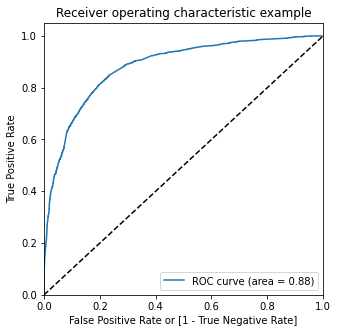

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC Curve should be a value close to 1. We are getting a value of 0.88 indicating a good predictive model.

### Step 8: Finding Optimal Cutoff Point

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196245,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.596108,1012,1,1,1,1,1,1,1,0,0,0,0
2,0,0.186879,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.885495,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.638172,7987,1,1,1,1,1,1,1,1,0,0,0


#### Sensitivity-Specificity Curve

In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.596442,0.968111,0.363636
0.2,0.2,0.762085,0.903516,0.673496
0.3,0.3,0.798772,0.842191,0.771575
0.4,0.4,0.810581,0.766966,0.837900
0.5,0.5,0.810738,0.693377,0.884251
0.6,0.6,0.807117,0.631643,0.917029
0.7,0.7,0.779090,0.508585,0.948528
0.8,0.8,0.756574,0.412919,0.971831
0.9,0.9,0.712329,0.271464,0.988476


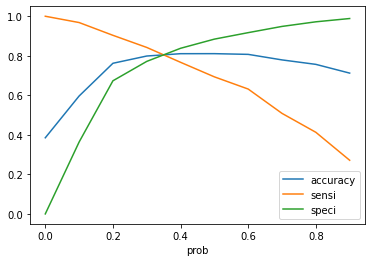

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

Checking Models Accuracy and Other parameters at 0.38 cut off

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196245,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.596108,1012,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.186879,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.885495,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.638172,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [101]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196245,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.596108,1012,1,1,1,1,1,1,1,0,0,0,0,1,60
2,0,0.186879,9226,0,1,1,0,0,0,0,0,0,0,0,0,19
3,1,0.885495,4750,1,1,1,1,1,1,1,1,1,1,0,1,89
4,1,0.638172,7987,1,1,1,1,1,1,1,1,0,0,0,1,64


In [102]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print("-------------------------\n Confusion Matrix")
print(confusion2)
print("-------------------------")
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print("Accuracy : {}%".format(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,1)))
print("Sensitivity : {}%".format(round(TP / float(TP+FN)*100,1)))
print("Specificity : {}%".format(round(TN / float(TN+FP)*100,1)))
print("False Postive Rate : {}%".format(round(FP/ float(TN+FP)*100,1))) # predicting churn when customer does not have churned
print("Positive Predictive Value : {}%".format(round(TP / float(TP+FP)*100,1)))
print("Negative Predictive Value : {}%".format(round(TN / float(TN+ FN)*100,1)))
print("Precision : {}%".format(round(TP / float(TP+FP)*100,1)))
print("Recall : {}%".format(round(TP / float(TP+FN)*100,1)))

-------------------------
 Confusion Matrix
[[3223  682]
 [ 531 1915]]
-------------------------
Accuracy : 80.9%
Sensitivity : 78.3%
Specificity : 82.5%
False Postive Rate : 17.5%
Positive Predictive Value : 73.7%
Negative Predictive Value : 85.9%
Precision : 73.7%
Recall : 78.3%


#### Precision - Recall Curve

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

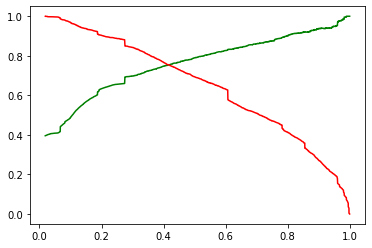

In [105]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [106]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196245,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.596108,1012,1,1,1,1,1,1,1,0,0,0,0,1,60
2,0,0.186879,9226,0,1,1,0,0,0,0,0,0,0,0,0,19
3,1,0.885495,4750,1,1,1,1,1,1,1,1,1,1,0,1,89
4,1,0.638172,7987,1,1,1,1,1,1,1,1,0,0,0,1,64


In [107]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print("-------------------------\n Confusion Matrix")
print(confusion3)
print("-------------------------")
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

print("Accuracy : {}%".format(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,1)))
print("Sensitivity : {}%".format(round(TP / float(TP+FN)*100,1)))
print("Specificity : {}%".format(round(TN / float(TN+FP)*100,1)))
print("False Postive Rate : {}%".format(round(FP/ float(TN+FP)*100,1))) # predicting churn when customer does not have churned
print("Positive Predictive Value : {}%".format(round(TP / float(TP+FP)*100,1)))
print("Negative Predictive Value : {}%".format(round(TN / float(TN+ FN)*100,1)))
print("Precision : {}%".format(round(TP / float(TP+FP)*100,1)))
print("Recall : {}%".format(round(TP / float(TP+FN)*100,1)))

-------------------------
 Confusion Matrix
[[3309  596]
 [ 609 1837]]
-------------------------
Accuracy : 81.0%
Sensitivity : 75.1%
Specificity : 84.7%
False Postive Rate : 15.3%
Positive Predictive Value : 75.5%
Negative Predictive Value : 84.5%
Precision : 75.5%
Recall : 75.1%


#### Using 0.42 (from Precision - Recall Curve) as the optimal cut off for our model.

### Step 9: Making predictions on the test set

#### Scaling test data

In [108]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.0,0.363636,0.069102,0.615385,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.0,0.454545,0.665933,0.769231,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7936,0.0,0.181818,0.032570,0.307692,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0.0,0.000000,0.000000,0.000000,0.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0.0,0.727273,0.072183,1.000000,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0.0,0.069102,0,0,0,0,0,0,0,0,1,0,0,0
1490,0.0,0.665933,0,0,0,0,0,0,1,0,1,0,0,0
7936,0.0,0.032570,0,0,0,0,0,0,0,0,1,0,0,0
4216,0.0,0.000000,1,0,0,0,0,0,0,0,0,1,0,0
3830,0.0,0.072183,0,0,0,0,0,0,0,0,1,0,0,0


#### Making predictions on the test set

In [110]:
X_test_sm = sm.add_constant(X_test)

In [111]:
y_test_pred = res.predict(X_test_sm)

In [112]:
y_test_pred[:10]

3271    0.128185
1490    0.972483
7936    0.110396
4216    0.781715
3830    0.129792
1800    0.652205
6507    0.361468
4821    0.300623
4223    0.960046
4714    0.186879
dtype: float64

In [113]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [114]:
# Let's see the head
y_pred_1.head()

,0
3271,0.128185
1490,0.972483
7936,0.110396
4216,0.781715
3830,0.129792


In [115]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [116]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [117]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [118]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [119]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.128185
1,1,1490,0.972483
2,0,7936,0.110396
3,1,4216,0.781715
4,0,3830,0.129792


In [120]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [121]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score
0,3271,0,0.128185,13
1,1490,1,0.972483,97
2,7936,0,0.110396,11
3,4216,1,0.781715,78
4,3830,0,0.129792,13


In [122]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [123]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score,final_predicted
0,3271,0,0.128185,13,0
1,1490,1,0.972483,97,1
2,7936,0,0.110396,11,0
3,4216,1,0.781715,78,1
4,3830,0,0.129792,13,0


In [124]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
print("After running the model on the Test Data, below is the metrics obtained:")
print("-------------------------\n Confusion Matrix")
print(confusion4)
print("-------------------------")
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

print("Accuracy : {}%".format(round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)*100,1)))
print("Sensitivity : {}%".format(round(TP / float(TP+FN)*100,1)))
print("Specificity : {}%".format(round(TN / float(TN+FP)*100,1)))
print("False Postive Rate : {}%".format(round(FP/ float(TN+FP)*100,1))) # predicting churn when customer does not have churned
print("Positive Predictive Value : {}%".format(round(TP / float(TP+FP)*100,1)))
print("Negative Predictive Value : {}%".format(round(TN / float(TN+ FN)*100,1)))
print("Precision : {}%".format(round(TP / float(TP+FP)*100,1)))
print("Recall : {}%".format(round(TP / float(TP+FN)*100,1)))

After running the model on the Test Data, below is the metrics obtained:
-------------------------
 Confusion Matrix
[[1474  260]
 [ 257  732]]
-------------------------
Accuracy : 81.0%
Sensitivity : 74.0%
Specificity : 85.0%
False Postive Rate : 15.0%
Positive Predictive Value : 73.8%
Negative Predictive Value : 85.2%
Precision : 73.8%
Recall : 74.0%


### Step 10: Conclusion

#### Comparing the values obtained for Train & Test:

Train Data: 
- Accuracy : 81.0%
- Sensitivity : 75.1%
- Specificity : 84.7%
- Precision : 75.5%
- Recall : 75.1%

Test Data: 
- Accuracy : 81.0%
- Sensitivity : 74.0%
- Specificity : 85.0%
- Precision : 73.8%
- Recall : 74.0%


The Model seems to predict the Conversion Rate very well.

#### Important features

In [125]:
res.params.sort_values(ascending=False)

Total Time Spent on Website                             4.642533
Lead Origin_Lead Add Form                               4.011833
What is your current occupation_Working Professional    2.711361
Lead Source_Welingak Website                            2.088927
Last Activity_Had a Phone Conversation                  2.011886
Lead Origin_Lead Import                                 1.571402
Lead Source_Olark Chat                                  1.265722
const                                                  -0.832591
Last Activity_Olark Chat Conversation                  -1.164637
Last Notable Activity_Email Opened                     -1.405320
Last Notable Activity_Page Visited on Website          -1.676281
Last Notable Activity_Olark Chat Conversation          -1.687373
Last Notable Activity_Email Link Clicked               -1.869840
Do Not Email                                           -1.885759
Last Notable Activity_Modified                         -1.903552
dtype: float64

#### Finding Top Leads

In [126]:
top_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
top_leads

,Prospect ID,Converted,Conversion_Prob,Lead_Score,final_predicted
1,1490,1,0.972483,97,1
8,4223,1,0.960046,96,1
21,2461,1,0.994873,99,1
23,5822,1,0.997242,100,1
25,2684,1,0.997242,100,1
...,...,...,...,...,...
2694,1566,1,0.952991,95,1
2699,6461,1,0.895927,90,1
2703,5741,1,0.918679,92,1
2715,6299,1,0.886215,89,1
